In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

import torch
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
import cv2

# Carregando as imagens

In [3]:
PATH_TRAIN_DS = Path("./IMG224_All/PROCESSED-TRAIN")


In [4]:
def load_file(path):
    return np.load(path).astype(np.float16)

In [6]:
#mean = torch.tensor([120.3738,  78.5918,  45.4685])
#stq = torch.tensor([73.2587, 53.2428, 36.9534])

train_transforms = transforms.Compose([
                                    transforms.ToTensor(),
                                    #transforms.Normalize(mean,stq)
])

In [7]:
TRAIN_DATASET = torchvision.datasets.DatasetFolder(
    PATH_TRAIN_DS,
    loader=load_file, extensions="npy", transform=train_transforms)

## Explorando imagens tratadas

In [8]:
def GetLabelDesc(label):
    """
        0-N - Normal
        1-D - Diabetes
        2-G - Glaucoma
        3-C - Catarata
        4-A - Degeneração macular
        5-H - Pressão alta
        6-M - Miopia patológica 
    """
    if(label==0):
        return "Normal"
    if(label==1):
        return "Diabetes"
    if(label==2):
        return "Glaucoma"
    if(label==3):
        return "Catarata"
    if(label==4):
        return "Deg macular"
    if(label==5):
        return "Pres alta"
    if(label==6):
        return "Miopia"
    
    return "ERR"

In [9]:
def numpyToImg(numpy_img):
    new_img = numpy_img.permute(1, 2, 0)
    new_img = new_img.numpy()
   
    return new_img.astype(np.uint8)
    

In [10]:
#label_0 = np.random.randint(low = 0, high=3089 , size=4) 
#label_1 = np.random.randint(low = 3091, high=4958 , size=4) 
#label_2 = np.random.randint(low = 4960, high=5866 , size=4) 
#label_3 = np.random.randint(low = 5868, high=6958 , size=4) 
#label_4 = np.random.randint(low = 6960, high= 7900, size=4) 
#label_5 = np.random.randint(low = 7909, high= 8318, size=4)
#label_6 = np.random.randint(low = 8322, high= 9250, size=4)

#rand_numbers = np.array([label_0, label_1, label_2, label_3, label_4, label_5, label_6])

inicial = 0
final = 3089
label_0 = np.random.randint(low = inicial, high= final , size=4)
inicial = final + 1
final = final + 934
label_1 = np.random.randint(low = inicial, high= final , size=4)
inicial = final + 1
final = final + 273 
label_3 = np.random.randint(low = inicial, high= final , size=4)
inicial = final + 1
final = final + 237 
label_4 = np.random.randint(low = inicial, high= final , size=4)
inicial = final + 1
final = final + 233 
label_6 = np.random.randint(low = inicial, high= final , size=4)


label_2 = []
label_5 = []


rand_numbers = np.array([label_0, label_1, label_2, label_3, label_4, label_5, label_6])



C:\Users\AsusTon\AppData\Local\Temp\ipykernel_8148\2711906413.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rand_numbers = np.array([label_0, label_1, label_2, label_3, label_4, label_5, label_6])


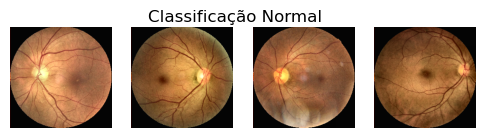

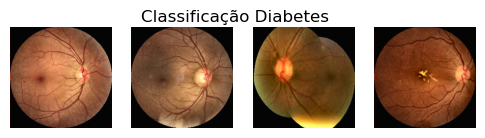

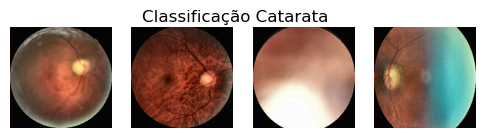

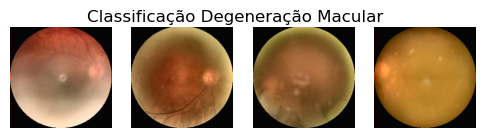

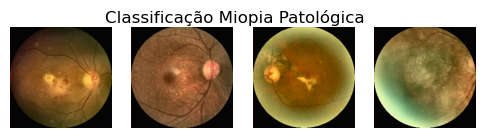

In [11]:

largura = 6
altura = 1.4

fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
plt.suptitle('Classificação Normal')
for i in range(4):
    axis[i].set_axis_off()
               
    img, label = TRAIN_DATASET[rand_numbers[0][i]]
    img = numpyToImg(img)
        
    axis[i].imshow(img)


fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
plt.suptitle('Classificação Diabetes')
for i in range(4):
    axis[i].set_axis_off()
               
    img, label = TRAIN_DATASET[rand_numbers[1][i]]
    img = numpyToImg(img)
        
    axis[i].imshow(img)

#fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
#plt.suptitle('Classificação Glaucoma')
#for i in range(4):
#    axis[i].set_axis_off()
               
#    img, label = TRAIN_DATASET[rand_numbers[2][i]]
#    img = numpyToImg(img)
        
#    axis[i].imshow(img)
    
fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
plt.suptitle('Classificação Catarata')
for i in range(4):
    axis[i].set_axis_off()
               
    img, label = TRAIN_DATASET[rand_numbers[3][i]]
    img = numpyToImg(img)
        
    axis[i].imshow(img)

fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
plt.suptitle('Classificação Degeneração Macular')
for i in range(4):
    axis[i].set_axis_off()
               
    img, label = TRAIN_DATASET[rand_numbers[4][i]]
    img = numpyToImg(img)
        
    axis[i].imshow(img)
    
#fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
#plt.suptitle('Classificação Pressão Alta')
#for i in range(4):
#    axis[i].set_axis_off()
               
#    img, label = TRAIN_DATASET[rand_numbers[5][i]]
#    img = numpyToImg(img)
        
#    axis[i].imshow(img)

fig, axis = plt.subplots(1, 4, figsize=(largura, altura), frameon=False)
plt.suptitle('Classificação Miopia Patológica')
for i in range(4):
    axis[i].set_axis_off()
               
    img, label = TRAIN_DATASET[rand_numbers[6][i]]
    img = numpyToImg(img)
        
    axis[i].imshow(img)

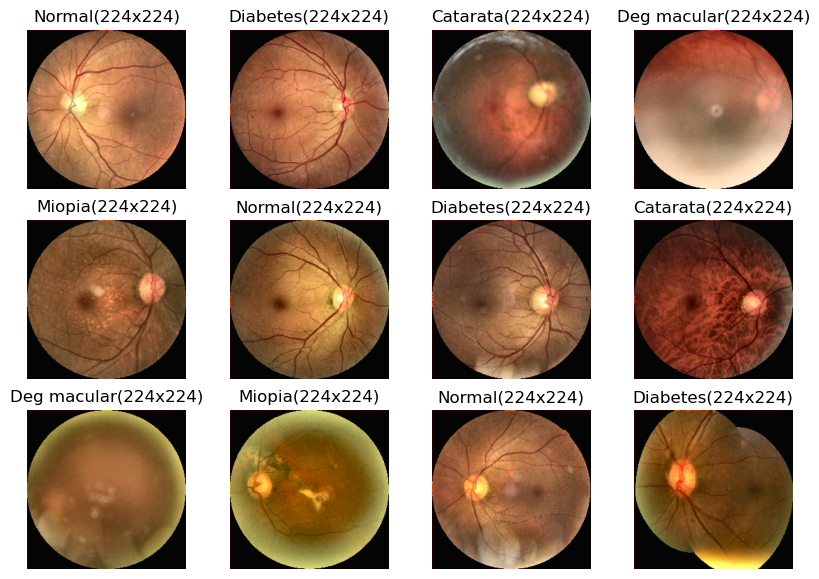

In [12]:
largura = 10
altura = 7

label_num = 0
fig, axis = plt.subplots(3, 4, figsize=(largura, altura), frameon=False)
#plt.suptitle('')
for i in range(3):
    for j in range(4):
        axis[i, j].set_axis_off()
               
        img, label = TRAIN_DATASET[rand_numbers[label_num][i]]
        img = numpyToImg(img)
    
        
        axis[i, j].imshow(img)
        axis[i, j].set_title(GetLabelDesc(label_num) + "(224x224)")
        
        if label_num == 0:
            label_num = 1
        elif label_num == 1:
            label_num = 3
        elif label_num == 3:
            label_num = 4
        elif label_num == 4:
            label_num = 6
        elif label_num == 6:
            label_num = 0
        
    
    
    
    

In [14]:
 if ds_training_eye.N.iloc[c] == "1":
            label = label + ' - Normal'
        elif ds_training_eye.D.iloc[c] == "1":
            label = label + ' - Diabetes'
        elif ds_training_eye.G.iloc[c] == "1":
            label = label + ' - Glaucoma'
        elif ds_training_eye.C.iloc[c] == "1":
            label = label + ' - Catarata'
        elif ds_training_eye.A.iloc[c] == "1":
            label = label + ' - Deg. macular'
        elif ds_training_eye.H.iloc[c] == "1":
            label = label + ' - Pressão alta'
        elif ds_training_eye.M.iloc[c] == "1":
            label = label + ' - Mi. patológica'
        else:
            label = label + ' - Outras'
    
        label = label + " (" + str(h) + "x" + str(w) + ") "
        
        axis[i, j].set_title(label)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [16]:
#novo dataset
def GetLabes(keywords):
    arr =[];
    if classifica_normal(keywords) == "1":
        arr.append("N")
        return arr
    if classifica_diabetes(keywords) == "1":
        arr.append("D")
    if classifica_glaucoma(keywords) == "1":
        arr.append("G")
    if classifica_cataract(keywords) == "1":
        arr.append("C")
    if classifica_degeneracao_macular(keywords) == "1":
        arr.append("A")
    if classifica_pressao_alta(keywords) == "1":
        arr.append("H")
    if classifica_miopia_patologica(keywords) == "1":
        arr.append("M")
    if classifica_outras(keywords) == "1":
        arr.append("O")
        
    return arr
    

In [17]:
#novo dataset
def CreateDataEye(id, side, file_name, label, keywords):
    data = {"id":id,
            "side": side,
            "label": label,
            "keywords": keywords,
            "file_name": file_name
            }
    return data
    

In [18]:
#novo dataset
index = range(ds_training.shape[0])
arr_new_ds = []

for ii in index:
    data = ds_training.iloc[ii]
    
    arr_labels_left = GetLabes(data["left-keys"])
    arr_labels_right = GetLabes(data["right-keys"])
    
    for label_left in arr_labels_left:
        new_left_eye = CreateDataEye(ii, "left", data["left"], label_left, data["left-keys"])
        arr_new_ds.append(new_left_eye)
    
    for label_right in arr_labels_right:
        new_left_eye = CreateDataEye(ii, "right", data["right"], label_right, data["right-keys"])
        arr_new_ds.append(new_left_eye)

ds_eyes = pd.DataFrame(arr_new_ds)


NameError: name 'ds_training' is not defined

In [19]:
ds_eyes.head(30)

NameError: name 'ds_eyes' is not defined

In [20]:
teste = ds_eyes.groupby(["id", "side"])


NameError: name 'ds_eyes' is not defined

In [21]:
teste.label.count()

NameError: name 'teste' is not defined

In [22]:
co.shape

NameError: name 'co' is not defined

In [23]:
ds_eyes['count'] = ds_eyes.map()

NameError: name 'ds_eyes' is not defined

In [24]:
ds_eyes.head()

NameError: name 'ds_eyes' is not defined

In [25]:
ds_eyes_N_D_G_A_C_M = ds_eyes.query("label not in (\"O\",\"H\")")

NameError: name 'ds_eyes' is not defined

In [26]:
ds_eyes_N_D_G_A_C_M.head(30)

NameError: name 'ds_eyes_N_D_G_A_C_M' is not defined

NameError: name 'ds_eyes_N_D_G_A_C_M' is not defined

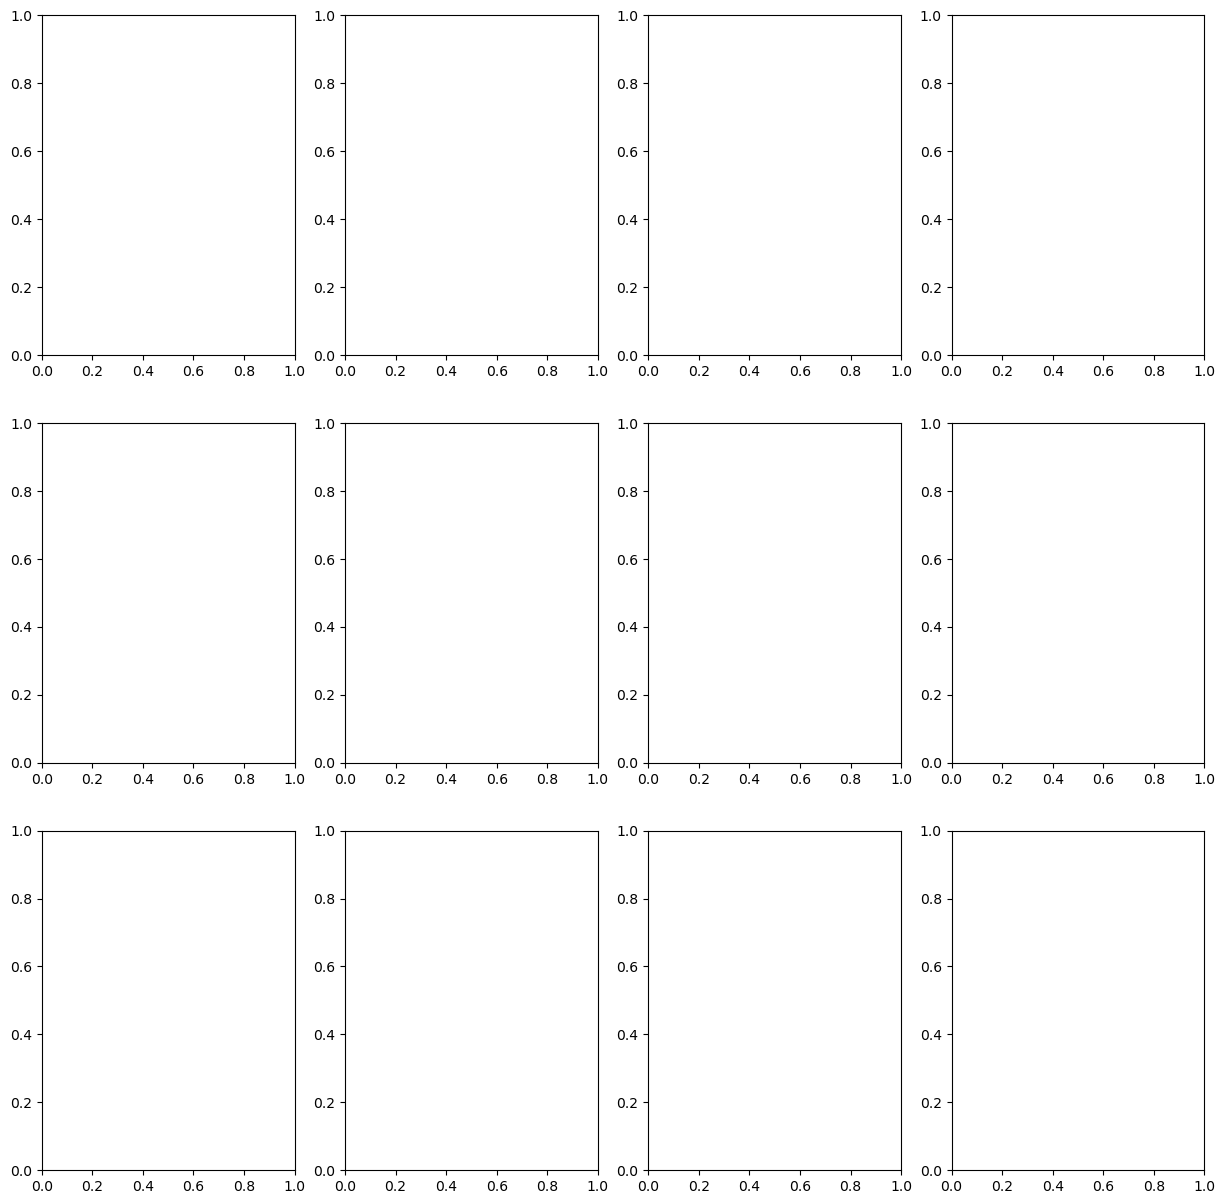

In [27]:
#C:\DSA\TCC\OIA-ODIR\Training Set\Images

IMG_HEIGHT = 500
IMG_WIDTH = 500

fig, axis = plt.subplots(3, 4, figsize=(15, 15))
c = 0
for i in range(3):
    for j in range(4):
        file_name = ds_eyes_N_D_G_A_C_M.file_name.iloc[c]
        img_path = path_ds_training_img / file_name
        img = cv2.imread(str(img_path))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        #img = RemoverMargens(img)        
        img = RemoverMargensBW(img)        
        
        #if ds_eyes.side.iloc[c] == "right":
        #    img = cv2.flip(img, 1)
            
        img = cv2.resize(img, (IMG_WIDTH,IMG_HEIGHT))
        
        #axis[i][j].imshow(img)
        axis[i][j].imshow(img, cmap="gray")

        label = ds_eyes.side.iloc[c] + " - " + ds_eyes.label.iloc[c]
        
        axis[i, j].set_title(label)
        
        c+=1